# Data preprocessing

## Import the required modules

In [1]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler
import re
import ast

## Load the dataset
1. Load the dataset
2. Convert it into a pandas DataFrame

In [2]:
dataset_raw = dd.read_parquet('dataset/dataset_raw.parquet')

In [3]:
dataset_pd = pd.DataFrame(dataset_raw.compute())
dataset_pd.head()

,authors,title,comments,journal-ref,categories,abstract,update_date,authors_parsed,citation_count
doi,,,,,,,,,
10.1002/adfm.202001307,"Qinghua Zhao, Wanqi Jie, Tao Wang, Andres Cast...",InSe Schottky diodes based on van der Waals co...,"25 pages, 13 figures, Main text and Supporting...","Advanced Functional Materials, 30, 2001307 (2020)",cond-mat.mes-hall cond-mat.mtrl-sci,Two-dimensional semiconductors are excellent...,2020-07-30,"[['Zhao', 'Qinghua', ''], ['Jie', 'Wanqi', '']...",33
10.1002/cphc.200900857,"Haifeng Ma, Thomas Brugger, Simon Berner, Yun ...",Boron Nitride Nanomesh: A template for Nano-ice,4 figures,"ChemPhysChem 2010, 11, 399",cond-mat.mtrl-sci cond-mat.mes-hall,Using variable temperature scanning tunnelin...,2010-02-04,"[['Ma', 'Haifeng', ''], ['Brugger', 'Thomas', ...",33
10.1002/prop.200710532,"Milovan Vasilic, Marko Vojinovic",Interaction of the Particle with the String in...,"Proceedings of the BW2007 conference, 5 pages","Fortsch.Phys.56:542,2008",gr-qc hep-th,Within the framework of generalized Papapetr...,2015-05-20,"[['Vasilic', 'Milovan', ''], ['Vojinovic', 'Ma...",1
10.1007/978-3-030-30493-5_44,"Itay Mosafi, Eli David, Nathan S. Netanyahu",DeepMimic: Mentor-Student Unlabeled Data Based...,<NA>,International Conference on Artificial Neural ...,cs.LG cs.NE stat.ML,"In this paper, we present a deep neural netw...",2019-12-03,"[['Mosafi', 'Itay', ''], ['David', 'Eli', ''],...",0
10.1007/lrr-2015-1,"Vitor Cardoso, Leonardo Gualtieri, Carlos Herd...",Exploring New Physics Frontiers Through Numeri...,"156 pages, 21 figures. Published in Living Rev...",<NA>,gr-qc astro-ph.HE hep-ph hep-th,The demand to obtain answers to highly compl...,2015-11-11,"[['Cardoso', 'Vitor', ''], ['Gualtieri', 'Leon...",55


## Feature Extraction
1. Extracting page count and number of figures
2. Extracting the number of authors
3. Extracting the year, month and day of the publication date

### Extracting page count and number of figures

In [4]:
# Let's look at the corresponding field first
display(dataset_pd["comments"].head(10))
display(
    f"Non-null elements: {dataset_pd['comments'].notna().sum() / len(dataset_pd['comments']):.2%}"
)


# Let's look at the pages attribute
def extract_page_number(comment: str) -> int:
    try:
        return int(re.search(r"(\d+) pages", comment).group(1))
    except (ValueError, TypeError, AttributeError):
        return np.nan


print("Extracted pages")
dataset_pd["page_count"] = dataset_pd["comments"].apply(extract_page_number)
display(dataset_pd["page_count"].head(10))
display(
    f"Non-null elements: {dataset_pd['page_count'].notna().sum() / len(dataset_pd['page_count']):.2%}"
)


# Let's look at the figure count
def extract_figure_count(comment: str) -> int:
    try:
        return int(re.search(r"(\d+) figures", comment).group(1))
    except (ValueError, TypeError, AttributeError):
        return np.nan


print("Extracted figures")
dataset_pd["figure_count"] = dataset_pd["comments"].apply(extract_figure_count)
display(dataset_pd["figure_count"].head(10))
display(
    f"Non-null elements: {dataset_pd['figure_count'].notna().sum() / len(dataset_pd['figure_count']):.2%}"
)

display(
    f"Number of rows with both figures and pages: {dataset_pd[['figure_count', 'page_count']].notna().all(axis=1).sum() / len(dataset_pd):.2%}"
)

doi
10.1002/adfm.202001307          25 pages, 13 figures, Main text and Supporting...
10.1002/cphc.200900857                                                  4 figures
10.1002/prop.200710532              Proceedings of the BW2007 conference, 5 pages
10.1007/978-3-030-30493-5_44                                                 <NA>
10.1007/lrr-2015-1              156 pages, 21 figures. Published in Living Rev...
10.1007/s00025-018-0843-4                                                    <NA>
10.1007/s00220-011-1211-3                                         55 pages, LaTeX
10.1007/s00220-012-1502-3       This is the preprint of the version published ...
10.1007/s00220-013-1746-6       39 pages, 3 figures. (Minor improvements/corre...
10.1007/s00220-022-04520-9                                                   <NA>
Name: comments, dtype: string

'Non-null elements: 84.17%'

Extracted pages


doi
10.1002/adfm.202001307           25.0
10.1002/cphc.200900857            NaN
10.1002/prop.200710532            5.0
10.1007/978-3-030-30493-5_44      NaN
10.1007/lrr-2015-1              156.0
10.1007/s00025-018-0843-4         NaN
10.1007/s00220-011-1211-3        55.0
10.1007/s00220-012-1502-3         NaN
10.1007/s00220-013-1746-6        39.0
10.1007/s00220-022-04520-9        NaN
Name: page_count, dtype: float64

'Non-null elements: 66.37%'

Extracted figures


doi
10.1002/adfm.202001307          13.0
10.1002/cphc.200900857           4.0
10.1002/prop.200710532           NaN
10.1007/978-3-030-30493-5_44     NaN
10.1007/lrr-2015-1              21.0
10.1007/s00025-018-0843-4        NaN
10.1007/s00220-011-1211-3        NaN
10.1007/s00220-012-1502-3        NaN
10.1007/s00220-013-1746-6        3.0
10.1007/s00220-022-04520-9       NaN
Name: figure_count, dtype: float64

'Non-null elements: 46.08%'

'Number of rows with both figures and pages: 44.55%'

In [5]:
dataset_pd[["figure_count", "page_count"]].describe()

,figure_count,page_count
count,264450.000000,380908.000000
mean,8.267865,18.152528
std,12.493989,16.108582
min,0.000000,0.000000
25%,4.000000,9.000000
50%,6.000000,15.000000
75%,10.000000,23.000000
max,4989.000000,2018.000000


In [6]:
dataset_pd[dataset_pd["figure_count"] == 4989]

,authors,title,comments,journal-ref,categories,abstract,update_date,authors_parsed,citation_count,page_count,figure_count
doi,,,,,,,,,,,
10.1038/s41586-019-0954-4,"M. G. Vergniory, L. Elcoro, C. Felser, N. Regn...",The (High Quality) Topological Materials In Th...,"1958 pages and 4989 figures. New Version, seve...","Nature 566, 480-485 (2019)",cond-mat.mtrl-sci,"""Topological Quantum Chemistry (TQC) links t...",2019-11-15,"[['Vergniory', 'M. G.', ''], ['Elcoro', 'L.', ...",565,1958.0,4989.0


### Extracting the number of authors

In [7]:
# Let's look at the authors
dataset_pd["authors"].values[:20]

dataset_pd["author_count"] = dataset_pd["authors_parsed"].apply(
    lambda authors: len(ast.literal_eval(authors))
)

display(dataset_pd["author_count"].describe())


count    573904.000000
mean          5.275722
std          22.210146
min           1.000000
25%           2.000000
50%           3.000000
75%           5.000000
max        2832.000000
Name: author_count, dtype: float64

In [8]:
dataset_pd[dataset_pd["author_count"] > 1000].head(5)

,authors,title,comments,journal-ref,categories,abstract,update_date,authors_parsed,citation_count,page_count,figure_count,author_count
doi,,,,,,,,,,,,
10.3847/1538-4357/ac6acf,"The LIGO Scientific Collaboration, the Virgo C...",Searches for Gravitational Waves from Known Pu...,37 pages,<NA>,astro-ph.HE gr-qc,We present a targeted search for continuous ...,2022-08-31,"[['The LIGO Scientific Collaboration', '', '']...",4,37.0,NaN,1697
10.3847/2041-8213/aa93fc,The LIGO Scientific Collaboration and the Virg...,On the Progenitor of Binary Neutron Star Merge...,"18 pages, 8 figures, 2 tables","ApJL, 850, L40, 2017",astro-ph.HE,On 2017 August 17 the merger of two compact ...,2017-12-04,"[['The LIGO Scientific Collaboration', '', '']...",55,18.0,8.0,1098
10.3847/2041-8213/aa9a35,The LIGO Scientific Collaboration and the Virg...,Search for post-merger gravitational waves fro...,<NA>,"ApJL, 851:L16 (2017)",astro-ph.HE gr-qc,The first observation of a binary neutron st...,2017-12-18,"[['The LIGO Scientific Collaboration', '', '']...",156,NaN,NaN,1108
10.3847/0067-0049/225/1/8,"B. P. Abbott, R. Abbott, T. D. Abbott, M. R. A...",Supplement: Localization and broadband follow-...,"For the main Letter, see arXiv:1602.08492","The Astrophysical Journal Supplement Series, 2...",astro-ph.HE gr-qc,This Supplement provides supporting material...,2016-07-22,"[['Abbott', 'B. P.', '', 'The LIGO Scientific ...",39,NaN,NaN,1547
10.3847/1538-4357/aaf21d,"ANTARES, IceCube, LIGO, Virgo Collaborations: ...",Search for Multi-messenger Sources of Gravitat...,"20 pages, 2 figures",Astrophys.J. 870 (2019) 134,astro-ph.HE,Astrophysical sources of gravitational waves...,2020-08-14,"[['ANTARES', '', ''], ['IceCube', '', ''], ['L...",30,20.0,2.0,1595


### Extracting the year, month and day of the publication date

In [14]:
display(dataset_pd["update_date"].head(5))

dataset_pd["update_date"] = pd.to_datetime(dataset_pd["update_date"])
dataset_pd["year"] = dataset_pd["update_date"].dt.year
dataset_pd["month"] = dataset_pd["update_date"].dt.month
dataset_pd["day"] = dataset_pd["update_date"].dt.day

dataset_pd[["update_date", "year", "month", "day"]].head(5)

doi
10.1002/adfm.202001307          2020-07-30
10.1002/cphc.200900857          2010-02-04
10.1002/prop.200710532          2015-05-20
10.1007/978-3-030-30493-5_44    2019-12-03
10.1007/lrr-2015-1              2015-11-11
Name: update_date, dtype: string

,update_date,year,month,day
doi,,,,
10.1002/adfm.202001307,2020-07-30,2020,7,30
10.1002/cphc.200900857,2010-02-04,2010,2,4
10.1002/prop.200710532,2015-05-20,2015,5,20
10.1007/978-3-030-30493-5_44,2019-12-03,2019,12,3
10.1007/lrr-2015-1,2015-11-11,2015,11,11


### Dropping the unnecessary columns and saving the dataset

In [15]:
dataset_pd = dataset_pd.drop(["comments", "authors_parsed", "update_date"], axis=1)
dataset_pd.head()

,authors,title,journal-ref,categories,abstract,citation_count,page_count,figure_count,author_count,year,month,day
doi,,,,,,,,,,,,
10.1002/adfm.202001307,"Qinghua Zhao, Wanqi Jie, Tao Wang, Andres Cast...",InSe Schottky diodes based on van der Waals co...,"Advanced Functional Materials, 30, 2001307 (2020)",cond-mat.mes-hall cond-mat.mtrl-sci,Two-dimensional semiconductors are excellent...,33,25.0,13.0,5,2020,7,30
10.1002/cphc.200900857,"Haifeng Ma, Thomas Brugger, Simon Berner, Yun ...",Boron Nitride Nanomesh: A template for Nano-ice,"ChemPhysChem 2010, 11, 399",cond-mat.mtrl-sci cond-mat.mes-hall,Using variable temperature scanning tunnelin...,33,NaN,4.0,8,2010,2,4
10.1002/prop.200710532,"Milovan Vasilic, Marko Vojinovic",Interaction of the Particle with the String in...,"Fortsch.Phys.56:542,2008",gr-qc hep-th,Within the framework of generalized Papapetr...,1,5.0,NaN,2,2015,5,20
10.1007/978-3-030-30493-5_44,"Itay Mosafi, Eli David, Nathan S. Netanyahu",DeepMimic: Mentor-Student Unlabeled Data Based...,International Conference on Artificial Neural ...,cs.LG cs.NE stat.ML,"In this paper, we present a deep neural netw...",0,NaN,NaN,3,2019,12,3
10.1007/lrr-2015-1,"Vitor Cardoso, Leonardo Gualtieri, Carlos Herd...",Exploring New Physics Frontiers Through Numeri...,<NA>,gr-qc astro-ph.HE hep-ph hep-th,The demand to obtain answers to highly compl...,55,156.0,21.0,4,2015,11,11


In [16]:
dataset_pd.to_parquet("dataset/dataset_feature_extracted.parquet")

## Textual Data processing

1. Tokenization
2. Stopword removal
3. Stemming
4. Lemmatization
5. Vectorization

### Loading the dataset from parquet

In [30]:
dataset_pd = pd.read_parquet("dataset/dataset_feature_extracted.parquet")

### Concatenating all text columns

In [33]:
text_columns = ["authors", "title", "journal-ref", "categories", "abstract"]

for column in text_columns:
    dataset_pd[column].loc[dataset_pd[column].notna() == False] = ""

dataset_pd["text"] = dataset_pd[text_columns].apply(
    lambda x: " ".join(x), axis=1
)

In [37]:
dataset_pd = dataset_pd.drop(text_columns, axis=1)

In [38]:
dataset_pd.head()

,update_date,citation_count,pages,figures,author_count,text
doi,,,,,,
10.1002/adfm.202001307,2020-07-30,33,25.0,13.0,5,"Qinghua Zhao, Wanqi Jie, Tao Wang, Andres Cast..."
10.1002/cphc.200900857,2010-02-04,33,NaN,4.0,8,"Haifeng Ma, Thomas Brugger, Simon Berner, Yun ..."
10.1002/prop.200710532,2015-05-20,1,5.0,NaN,2,"Milovan Vasilic, Marko Vojinovic Interaction o..."
10.1007/978-3-030-30493-5_44,2019-12-03,0,NaN,NaN,3,"Itay Mosafi, Eli David, Nathan S. Netanyahu De..."
10.1007/lrr-2015-1,2015-11-11,55,156.0,21.0,4,"Vitor Cardoso, Leonardo Gualtieri, Carlos Herd..."


## Data cleaning

1. Remove duplicates
2. Deal with outliers
3. Deal with missing data
4. ...

## Defining the target variable
1. Analyzing the citation count distribution
2. Group citations into categories
3. Create ordinal target variable

### Analyze the citation count distribution
1. Calculate the descriptive statistics
2. Calculate the number of elements for given count ranges
3. Plot the distribution as histogram

In [6]:
print("Descriptive statistics:")
print(dataset_pd["citation_count"].describe())
print("")

count_ranges = [
    (0, 5),
    (5, 10),
    (10, 20),
    (20, 50),
    (50, 100),
    (100, 500),
    (500, 1000),
    (1000, 5000),
    (5000, 10000),
    (10000, 100000),
]
for count_range in count_ranges:
    print(
        f"Number of elements between {count_range[0]} and {count_range[1]}: {len(dataset_pd[(dataset_pd['citation_count'] >= count_range[0]) & (dataset_pd['citation_count'] < count_range[1])])}"
    )

Descriptive statistics:
count    573904.000000
mean         30.975079
std         143.814509
min           0.000000
25%           3.000000
50%          10.000000
75%          28.000000
max       50051.000000
Name: citation_count, dtype: float64

Number of elements between 0 and 5: 185354
Number of elements between 5 and 10: 95357
Number of elements between 10 and 20: 103529
Number of elements between 20 and 50: 110197
Number of elements between 50 and 100: 46671
Number of elements between 100 and 500: 30038
Number of elements between 500 and 1000: 1909
Number of elements between 1000 and 5000: 781
Number of elements between 5000 and 10000: 55
Number of elements between 10000 and 100000: 13


<Axes: title={'center': 'Citation Count Distribution'}, ylabel='Frequency'>

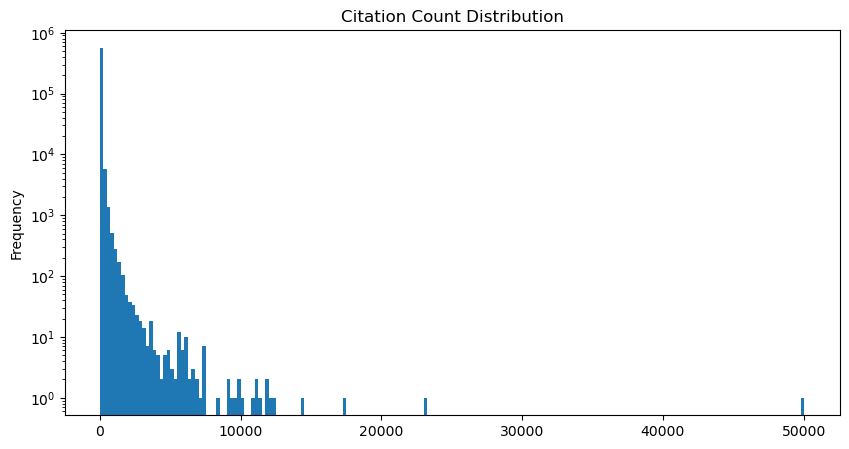

In [7]:
dataset_pd['citation_count'].plot(kind='hist', bins=200, logy=True, figsize=(10, 5), title='Citation Count Distribution')

<Axes: title={'center': 'Citation Count Distribution (Citations < 10000)'}, ylabel='Frequency'>

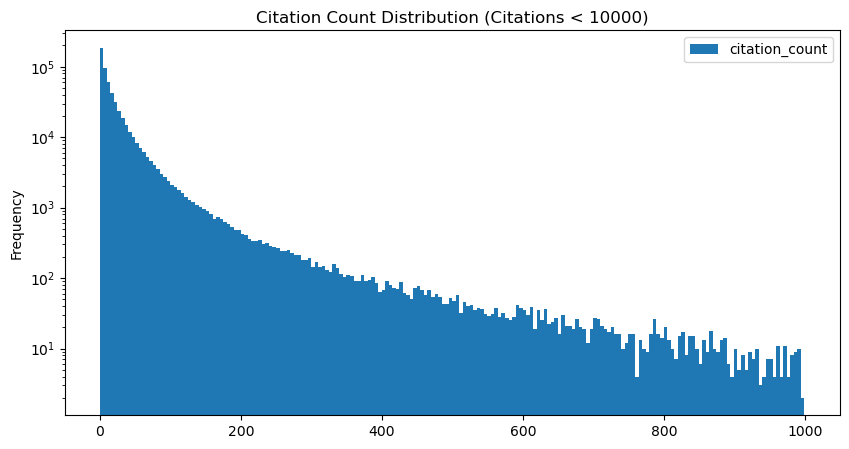

In [8]:
dataset_pd[dataset_pd['citation_count'] < 1000].plot(kind='hist', bins=200, logy=True, figsize=(10, 5), title='Citation Count Distribution (Citations < 10000)')

## Feature Selection and dimensionality reduction
Analyze the data!


## Model training and evaluation

1. Split data into train, val and test set
2. Select appropriate model candidates
3. Train models, evaluate them
4. Select best model
5. Perform hyperparameter tuning